<a href="https://colab.research.google.com/github/burroughs121/ES2245/blob/main/ES2245_lab4%2C_LizBurroughs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 4: Uncertainty, Statistics, and Time Series Analysis
**Course:** EARTHSC 2245: Introductory Data Analysis for Earth and Environmental Sciences
**Estimated Time:** 60-75 Minutes

## Objective
In this laboratory, you will apply the mathematical frameworks discussed in **Lecture 6** (Uncertainty Propagation) and **Lecture 7** (Stochastic Processes & Normal Distribution).

**Learning Goals:**
1.  **Uncertainty:** Propagate errors through density and power-law calculations.
2.  **Statistics:** Analyze the moments of the Normal Distribution (Skewness/Kurtosis) and demonstrate the Central Limit Theorem.
3.  **Time Series Analysis:** Simulate Stochastic Processes (White Noise vs. Random Walk) and analyze their temporal dependence using Autocorrelation.

## Part 1: Propagation of Uncertainty (Lecture 6)

### Theory Recap
Recall from Lecture 6 that we rarely measure the final result directly. We usually measure raw quantities to calculate a derived quantity.
* **Addition/Subtraction:** Absolute uncertainties add in quadrature ($z = x + y \rightarrow \delta z = \sqrt{\delta x^2 + \delta y^2}$).
* **Multiplication/Division:** Fractional (relative) uncertainties add in quadrature ($z = x \cdot y \rightarrow \frac{\delta z}{|z|} = \sqrt{(\frac{\delta x}{|x|})^2 + (\frac{\delta y}{|y|})^2}$).
* **Power Law:** Relative uncertainty is multiplied by the power ($z = x^n \rightarrow \frac{\delta z}{|z|} = |n| \frac{\delta x}{|x|}$).

### Exercise 1: Calculating Density with Uncertainty
You have measured a rock sample with the following properties:
* **Mass ($m$):** $45.2 \pm 0.8$ g
* **Volume ($V$):** $16.5 \pm 1.2$ cm³

**Task:**
1.  Calculate the density $\rho = m/V$.
2.  Calculate the fractional uncertainty for both mass and volume.
3.  Propagate these uncertainties to find the **absolute uncertainty** of the density ($\delta \rho$).
4.  Print the final result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# 1. Define variables
m = 45.2        # mass in g
delta_m = 0.8   # uncertainty in mass

V = 16.5        # volume in cm^3
delta_V = 1.2   # uncertainty in volume

# 2. Calculate Density (rho)
rho = m / V # TODO: Calculate rho

# 3. Calculate Fractional Uncertainties
frac_m = delta_m / m # TODO: Calculate fractional uncertainty of mass
frac_V = delta_V / V # TODO: Calculate fractional uncertainty of volume

# 4. Propagate Uncertainty
# Hint: For multiplication/division, fractional uncertainties add in quadrature.
# formula: sqrt(frac_m^2 + frac_V^2)
frac_rho = np.sqrt(frac_m**2 + frac_V**2)

# Convert back to absolute uncertainty (delta_rho)
delta_rho = frac_rho * 100 / (1 - frac_rho) # TODO: Calculate absolute uncertainty

print(f"Mass fractional error:   {frac_m:.4f}")
print(f"Volume fractional error: {frac_V:.4f}")
print(f"Density: {rho:.3f} +/- {delta_rho:.3f} g/cm^3")

Mass fractional error:   0.0177
Volume fractional error: 0.0727
Density: 2.739 +/- 8.091 g/cm^3


### Exercise 2: Power Laws in Earth Science
Many physical laws involve power functions. For example, the energy radiated by a black body is proportional to the **fourth power** of temperature ($E \propto T^4$).

**Task:**
1.  Assume a measured temperature $T = 300 \pm 3$ K.
2.  Calculate the fractional uncertainty of the Temperature ($T$).
3.  Calculate the fractional uncertainty of the Energy ($E$) using the Power Law rule.

In [2]:
# Variables
T = 300
delta_T = 3
n = 4  # The power from Stefan-Boltzmann law

# TODO: Calculate fractional uncertainty of T
frac_T = delta_T / T

# TODO: Calculate fractional uncertainty of E
# Hint: For z = x^n, the relative error is |n| times the relative error of x.
frac_E = n * frac_T

print(f"Temperature Fractional Uncertainty: {frac_T:.2%}")
print(f"Energy Fractional Uncertainty:      {frac_E:.2%}")
print(f"Factor of increase: {frac_E / frac_T:.1f}x")

Temperature Fractional Uncertainty: 1.00%
Energy Fractional Uncertainty:      4.00%
Factor of increase: 4.0x


## Part 2: Normal Distribution & CLT (Lecture 7)

### Exercise 3: Analyzing the Moments
Lecture 7 highlights that a Normal Distribution is fully described by its mean and variance. However, we also look at higher moments:
* **Skewness:** Measure of asymmetry (Normal = 0).
* **Kurtosis:** Measure of "peakedness" (Normal = 3, though `scipy` reports "excess kurtosis" where Normal = 0).

**Task:**
1.  Generate 10,000 random data points from a Normal Distribution ($\mu = 50, \sigma = 5$).
2.  Calculate the Mean, Std Dev, Skewness, and Kurtosis.
3.  Plot a histogram of the data.

Mean (Target 50): 50.010
Std  (Target 5):  4.987
Skewness (Target 0): 0.018
Excess Kurtosis (Target 0): 0.003


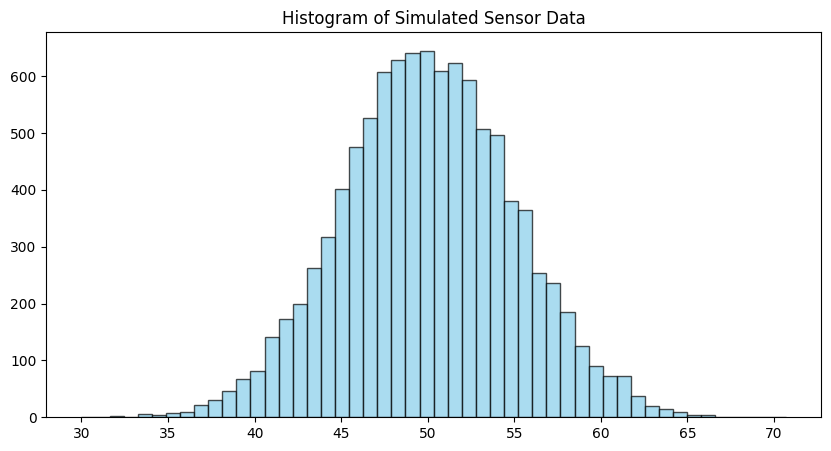

In [3]:
# 1. Generate Data
mu = 50
sigma = 5
n_samples = 10000

# TODO: Generate random normal data using np.random.normal
data = np.random.normal(mu, sigma, size=n_samples)

# 2. Calculate Statistics
calc_mean = np.mean(data) # TODO: np.mean
calc_std = np.std(data)  # TODO: np.std
calc_skew = skew(data) # TODO: skew()
calc_kurt = kurtosis(data) # TODO: kurtosis()

print(f"Mean (Target 50): {calc_mean:.3f}")
print(f"Std  (Target 5):  {calc_std:.3f}")
print(f"Skewness (Target 0): {calc_skew:.3f}")
print(f"Excess Kurtosis (Target 0): {calc_kurt:.3f}")

# 3. Plot Histogram
plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Simulated Sensor Data')
plt.show()

### Exercise 4: The Central Limit Theorem (CLT)
The CLT states that the distribution of *sample means* will approach a normal distribution, even if the source population is not normal.

**Task:**
1.  We have provided code to create a "Population" of 10,000 values from a **Uniform Distribution**.
2.  **Write a loop** to take 1,000 samples. In each iteration:
    * Select 30 random numbers from `pop_data`.
    * Calculate the mean of those 30 numbers.
    * Append it to the list `sample_means`.
3.  Observe the difference in the plots.

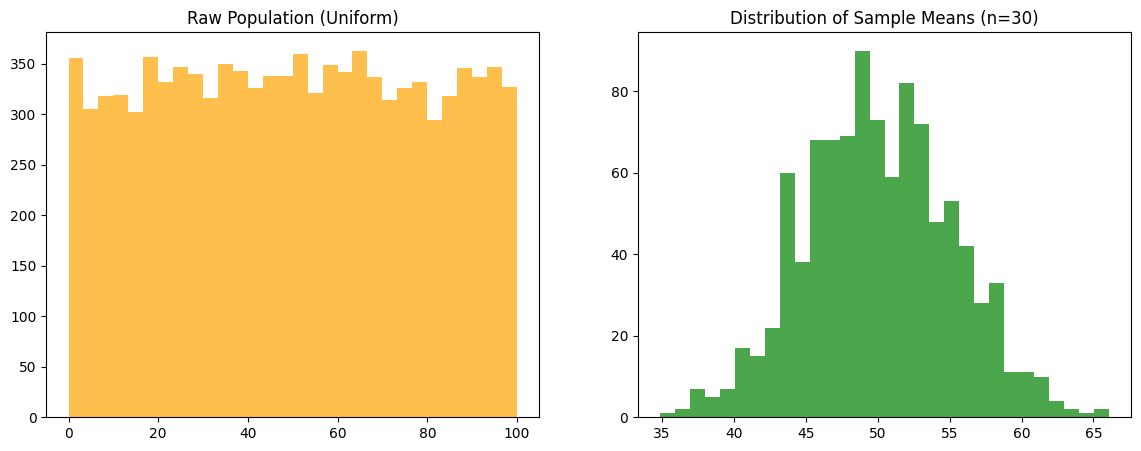

In [4]:
import random
# 1. Simulate the "Uniform" Population
pop_data = np.random.uniform(0, 100, 10000)

# 2. Perform Sampling (CLT Demo)
sample_means = []
sample_size = 30
num_experiments = 1000

# TODO: Write a for loop to populate sample_means
for i in range(num_experiments):
    ran_samp = random.choices(pop_data, k=sample_size)# a. Select a random subset of size 'sample_size' from 'pop_data'
    means = np.mean(ran_samp) # b. Calculate the mean of that subset
    sample_means.append(means) # c. Append the mean to 'sample_means'
     # remove this pass when you write your code

# 3. Plot Side-by-Side
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(pop_data, bins=30, color='orange', alpha=0.7)
plt.title('Raw Population (Uniform)')

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='green', alpha=0.7)
plt.title(f'Distribution of Sample Means (n={sample_size})')

plt.show()

## Part 3: Time Series Analysis & Stochastic Processes

### Exercise 5: Generating Error Models
Lecture 7 introduces specific error models:
* **White Noise:** Uncorrelated random error. $x_t = \epsilon_t$
* **Random Walk:** Accumulated error (integral of white noise). $x_t = x_{t-1} + \epsilon_t$

**Task:**
1.  Generate a **White Noise** signal of 500 steps (Standard Normal, $\mu=0, \sigma=1$).
2.  Generate a **Random Walk** signal by taking the cumulative sum (`np.cumsum`) of the white noise.

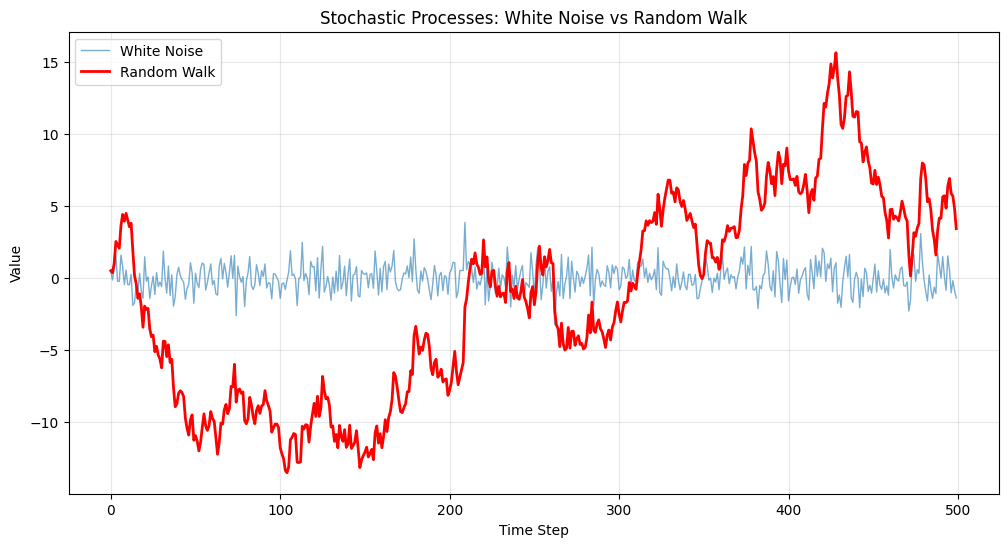

In [5]:
# Parameters
steps = 500
np.random.seed(42)

# 1. Generate White Noise
# TODO: Use np.random.normal to generate 'steps' number of points
white_noise = np.random.normal(0, 1, steps)

# 2. Generate Random Walk
# TODO: Use np.cumsum to integrate the white_noise
random_walk = np.cumsum(white_noise)

# 3. Plot
time = np.arange(steps)

plt.figure(figsize=(12, 6))
plt.plot(time, white_noise, label='White Noise', alpha=0.6, linewidth=1)
plt.plot(time, random_walk, label='Random Walk', linewidth=2, color='red')
plt.title('Stochastic Processes: White Noise vs Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercise 6: Autocorrelation Analysis (Time Series)
A key method for distinguishing time series models is **Autocorrelation**. This measures how correlated a signal is with a delayed ("lagged") version of itself.

* **White Noise:** Should have near-zero correlation for any lag > 0 (no memory).
* **Random Walk:** Should have very high correlation that decays slowly (strong memory).

**Task:**
1.  We have set up the figure for you.
2.  Use `plt.acorr` to plot the autocorrelation for `white_noise`.
3.  Use `plt.acorr` to plot the autocorrelation for `random_walk` (center it by subtracting the mean first!).

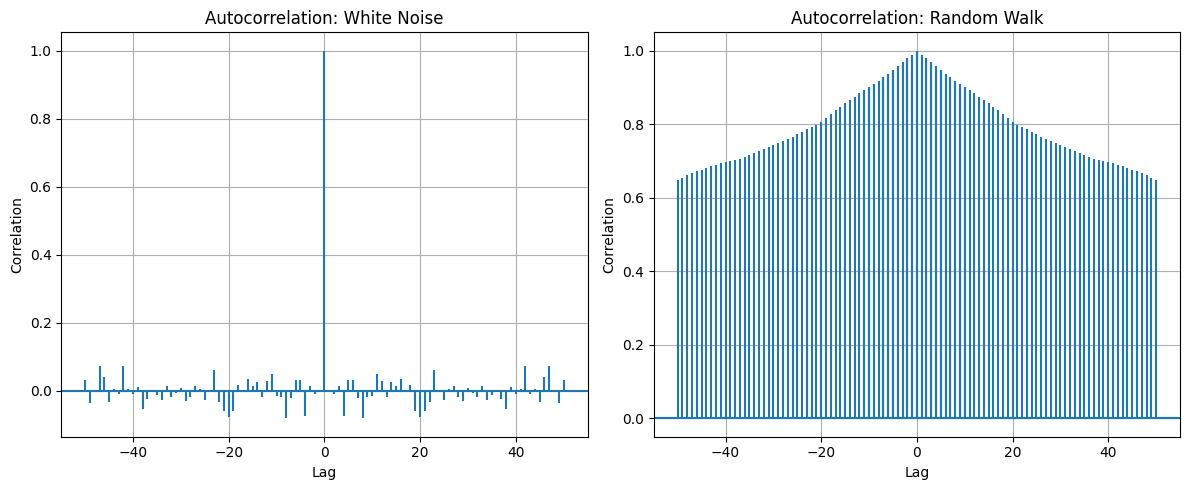

In [6]:
plt.figure(figsize=(12, 5))

# Plot Autocorrelation for White Noise
plt.subplot(1, 2, 1)
# TODO: Call plt.acorr() for white_noise.
# Recommended args: maxlags=50, usevlines=True, normed=True
plt.title('Autocorrelation: White Noise')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.acorr(white_noise, maxlags=50, usevlines=True, normed=True)

# Plot Autocorrelation for Random Walk
plt.subplot(1, 2, 2)
# TODO: Call plt.acorr() for random_walk.
plt.acorr(random_walk - np.mean(random_walk), maxlags=50, usevlines=True, normed=True)
# Note: You usually must subtract the mean (random_walk - np.mean(random_walk)) for acorr to work correctly.
plt.title('Autocorrelation: Random Walk')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)
plt.acorr(random_walk - np.mean(random_walk))
plt.tight_layout()
plt.show()

### Conceptual Questions

**Question 1:** Based on Lecture 6, describe the difference between **Epistemic** and **Aleatoric** uncertainty. In the Random Walk simulation (Exercise 5), which type of uncertainty does the "white noise" step represent at each individual moment?


* **Epistemic:**
* **Aleatoric: this data set is aleatoric because it is a plot of white noise, which is inherently completely random**
* **Simulation Link:**


**Question 2:** If you were modeling the flight path of a drone, which type of uncertainty would a **sudden wind gust** (white noise) represent versus a **miscalibrated compass** (constant bias/drift)?

*Double-click to edit this markdown cell and add your answer here:*
* **Wind Gust: Aleatoric**
* **Compass Bias: Epistemic**